<a href="https://colab.research.google.com/github/Ksangi/Netflix_Movies_And_Tv_Shows_Clustering/blob/main/Netflix_Movies_And_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <font size="+2" color='#947318'> <b>1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch



##  <font size="+2" color='#947318'> <b>2. Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_path = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(working_path)


##  <font size="+2" color='#947318'> <b>3. Basic Data Exploration 

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.5 MB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###  Defining *DataInfoAll*

In [ ]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [ ]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


###  Checking duplicate values

In [ ]:
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* No duplicate values present in this dataset.

##  <font size="+2" color='#154085'> <b>4. Data Cleaning & Data Visualization

###  Checking NaN values

In [ ]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values


* Ploting the null values present in the dataset


In [ ]:
plot_nan = df.isna()
plot_nan.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

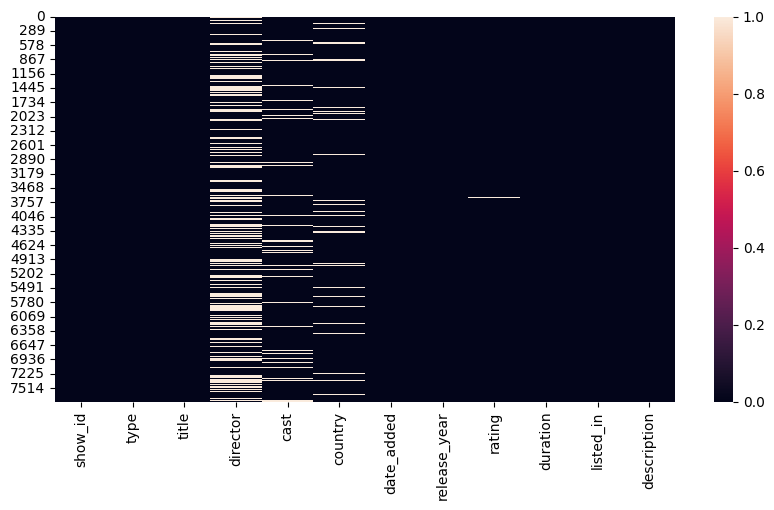

In [ ]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

* Using barplot to check the no of NaN values present in this dataset

<BarContainer object of 12 artists>

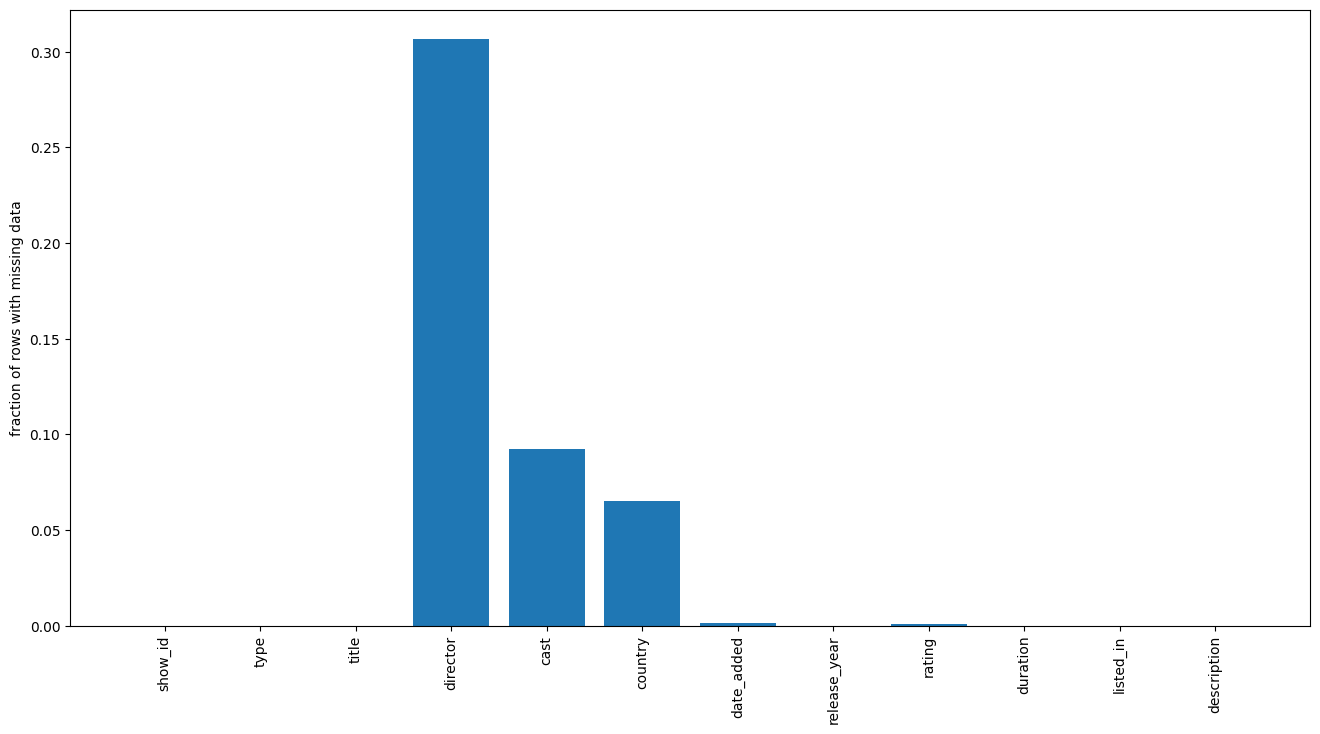

In [ ]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

director and cast contains large number of null values so we will drop it


###  Dropping irrelevent features 

In [ ]:
df.drop(['director','cast'],axis=1, inplace=True)

###  Looking NaN values on data_added 

In [ ]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [ ]:
data_added_NaN.shape

(10, 10)

* There are only 10 observations which are containing NaN values in *data_added* column

In [ ]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


###  Looking for unique values

In [ ]:
df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

* Unique values of *type* column

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

* ### <b><i> Production Growth </b> based on type of the content & release_year  

In [ ]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

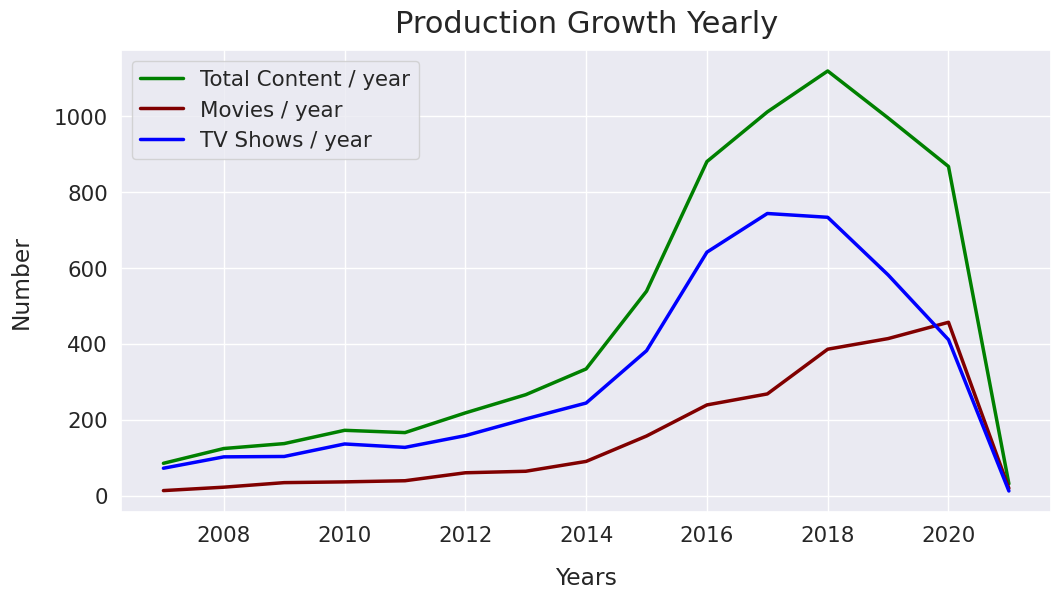

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

* ###  **release_year**

* ####  Let's see all unique values present in *release_year* 

In [ ]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

* ####  Checking the Datatype of *release_year* column

In [ ]:
type(df['release_year'][0])

numpy.int64

* ####  value_count is on release_year

In [ ]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


* ####  Checking **outliers** on *release_year* column

<Axes: >

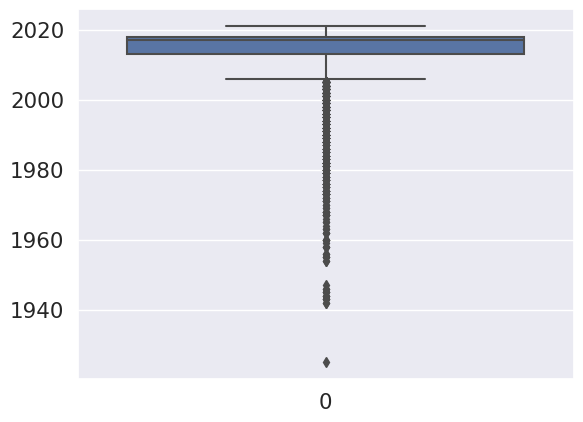

In [ ]:
sns.boxplot(df.release_year)

* As we have seen earlier **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why it's showing those values*(release_year less than 2009)* as outliers 

In [ ]:
type(df.release_year[0])

numpy.int64

* ####  Replacing outliers with mean value

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* we don't have have any release_year which is greater than 2018

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]                                            

In [ ]:
release_year_outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [ ]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

* ####  Boxplot for release_year 

In [ ]:
df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<Axes: >

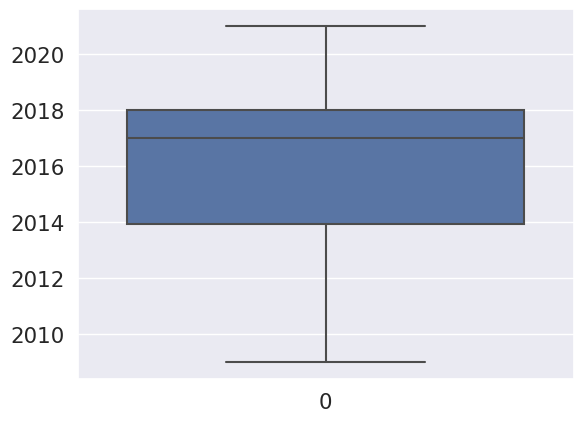

In [ ]:
sns.boxplot(df.release_year)

In [ ]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


* ### <b> Title 

* ####  No of unique title present in title column

In [ ]:
df.title.nunique()

7777

In [ ]:
df.shape[0]

7777

* All the values present in Title are unique

* ####  Most occured word in *Title* ??

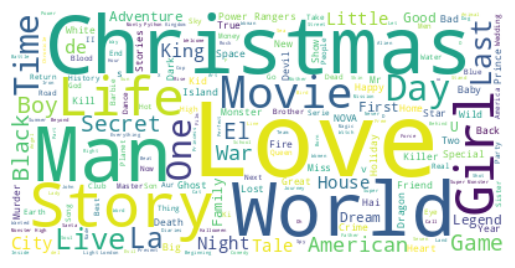

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Inference:**

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time . The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.

**Countries** producing most number of contents

Checking no of unique values present in Country ?

In [ ]:
df.country.nunique()

681



*   As you can see there are total 681 countries which are produce movies / tv shows



**Using value_counts()**

In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


**Check no of NaN values**

In [ ]:
df.country.isna().sum()

506



*   Let's replace those NaN values with mode value



In [ ]:
#mode value of country column
df.country.mode()[0]

'United States'

In [ ]:
df.country[df.country.isna()] = df.country.mode()[0]

<ipython-input-43-eedce7d3615c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[df.country.isna()] = df.country.mode()[0]


In [ ]:
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [ ]:
df.country.isna().sum()

0



* Now there is no NaN values present



 **Looking for countries and number of netflix productions**

In [ ]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country[:5]

[('Vatican City', 1, 0, 1),
 ('', 4, 0, 4),
 ('Mexico', 154, 53, 101),
 ('Argentina', 82, 18, 64),
 ('United Kingdom', 722, 255, 467)]

**Creating a new DataFrame country_df**

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [ ]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3797,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2661,915,467,286,265


<Axes: xlabel='country'>

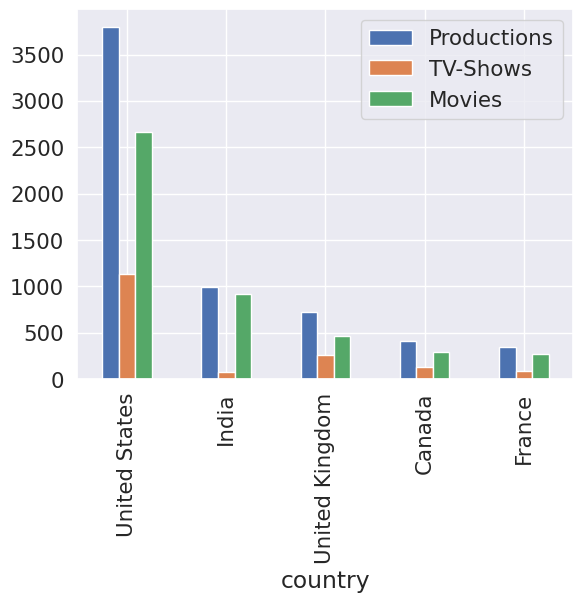

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

**Type**

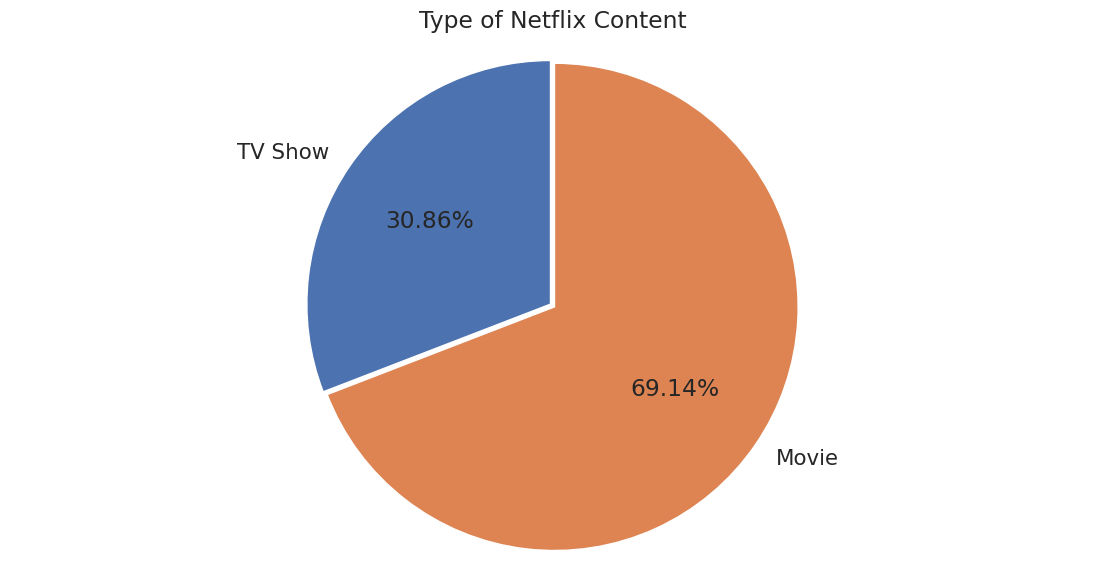

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()



*   Most of the contents are Movies
*   Less than ⅓ content are Tv Shows



**Duration**

Checking NaN values

In [ ]:
df.duration.isna().sum()

0



*   There is no NaN value present.



**Checking datatype**

In [ ]:
type(df.duration.iloc[0][0])

str

How many unique values present in duration column ??

In [ ]:
df.duration.nunique()

216

**Using value_count() method**

In [ ]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


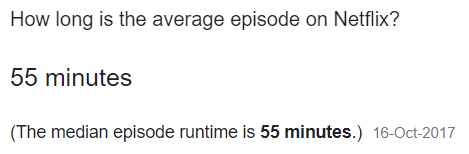

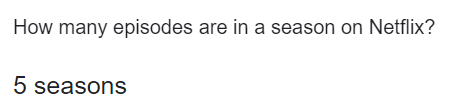

Define convert_seasons_to_min

In [ ]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [ ]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

**"4 Seasons"** : <br>
4 Seasons = (4*5) or 20 episodes<br>
Each episode avg. time is 55 mins.<br>
Total time (in minutes. ) = (55*20) min<br> = 1100 mins
                         

Define all_the_duration_in_minutes

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list 

In [ ]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
all_the_duration_in_minutes()

In [ ]:
df.duration.value_counts().to_frame().T

,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,3575,9,182,224,233,191
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


**Analysis on the duration of the movies**

<ipython-input-63-0d8584afa891>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)


<Axes: xlabel='duration', ylabel='Density'>

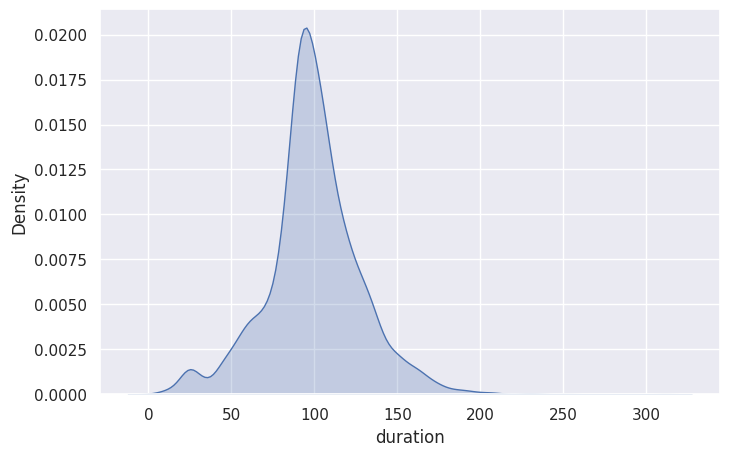

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)



*   Most content are about 70 to 120 min duration for movies



**Analysis on the duration of the TV-Shows**

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

<ipython-input-65-1b79f307a9f8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)


<Axes: xlabel='duration', ylabel='Density'>

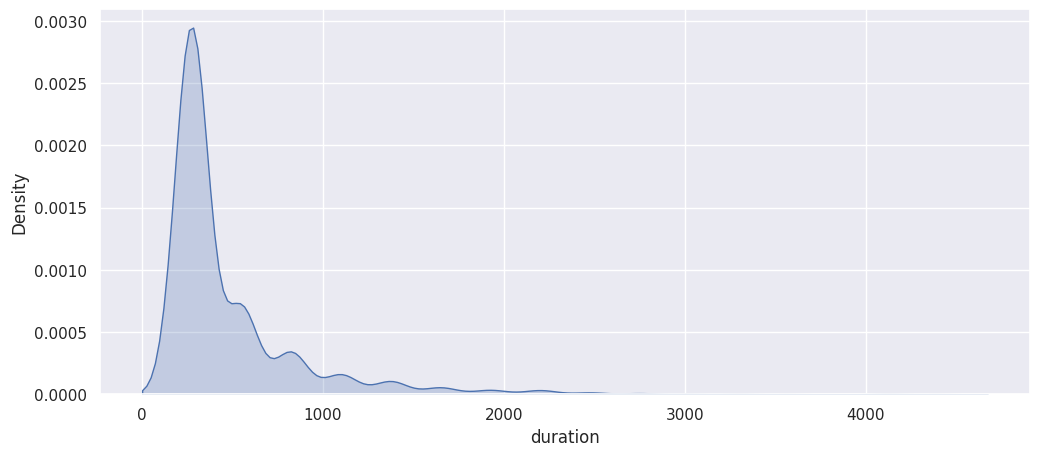

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

**listed_in**

How many unique values present in listed_in ??

In [ ]:
df.listed_in.nunique()

491

There are all total 491 unique values present

How many NaN values present in listed_in ?

In [ ]:
df.listed_in.isna().sum()

0

There is no NaN values present

**Value_counts()**

In [ ]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


**Making Categories**

In [ ]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [ ]:
len(categories)

17051

In [ ]:
len(set(categories))

42

There are **42 unique categories** present & in this dataset **all the categories occured in total 17051 times**

Creating a dictionary ( **category_wise_count **) where for each category there will be a value which basically tells us how many times that particular category occured

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
category_wise_count

{'TV Sci-Fi & Fantasy': 75,
 'LGBTQ Movies': 90,
 'Horror Movies': 312,
 'Thrillers': 491,
 'Stand-Up Comedy & Talk Shows': 52,
 'Sports Movies': 196,
 'Anime Series': 147,
 'Docuseries': 352,
 'Children & Family Movies': 532,
 'Romantic TV Shows': 333,
 'Romantic Movies': 531,
 'TV Mysteries': 90,
 'Korean TV Shows': 150,
 'Movies': 56,
 'Comedies': 1471,
 'Classic Movies': 103,
 'TV Comedies': 518,
 'TV Shows': 12,
 'Reality TV': 222,
 'Documentaries': 786,
 'Faith & Spirituality': 57,
 'Music & Musicals': 321,
 "Kids' TV": 412,
 'Classic & Cult TV': 25,
 'Stand-Up Comedy': 329,
 'Action & Adventure': 721,
 'Spanish-Language TV Shows': 146,
 'Sci-Fi & Fantasy': 218,
 'Anime Features': 57,
 'Teen TV Shows': 60,
 'TV Thrillers': 50,
 'TV Dramas': 703,
 'TV Horror': 69,
 'Independent Movies': 673,
 'Science & Nature TV': 85,
 'Dramas': 2106,
 'International TV Shows': 1198,
 'TV Action & Adventure': 149,
 'British TV Shows': 231,
 'Cult Movies': 59,
 'Crime TV Shows': 426,
 'Internation



*   Sorting category_wise_count by value


In [ ]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]



*  Top 5 least occurred category



In [ ]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]



*   Top 5 most occurred category



In [ ]:
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]



*   Top 10 most occurred categories



In [ ]:
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [ ]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [ ]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [ ]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [ ]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1198, 1471, 2106, 2437]

**TOP 10 Most Occurred Category By Count**

<Figure size 1600x800 with 0 Axes>

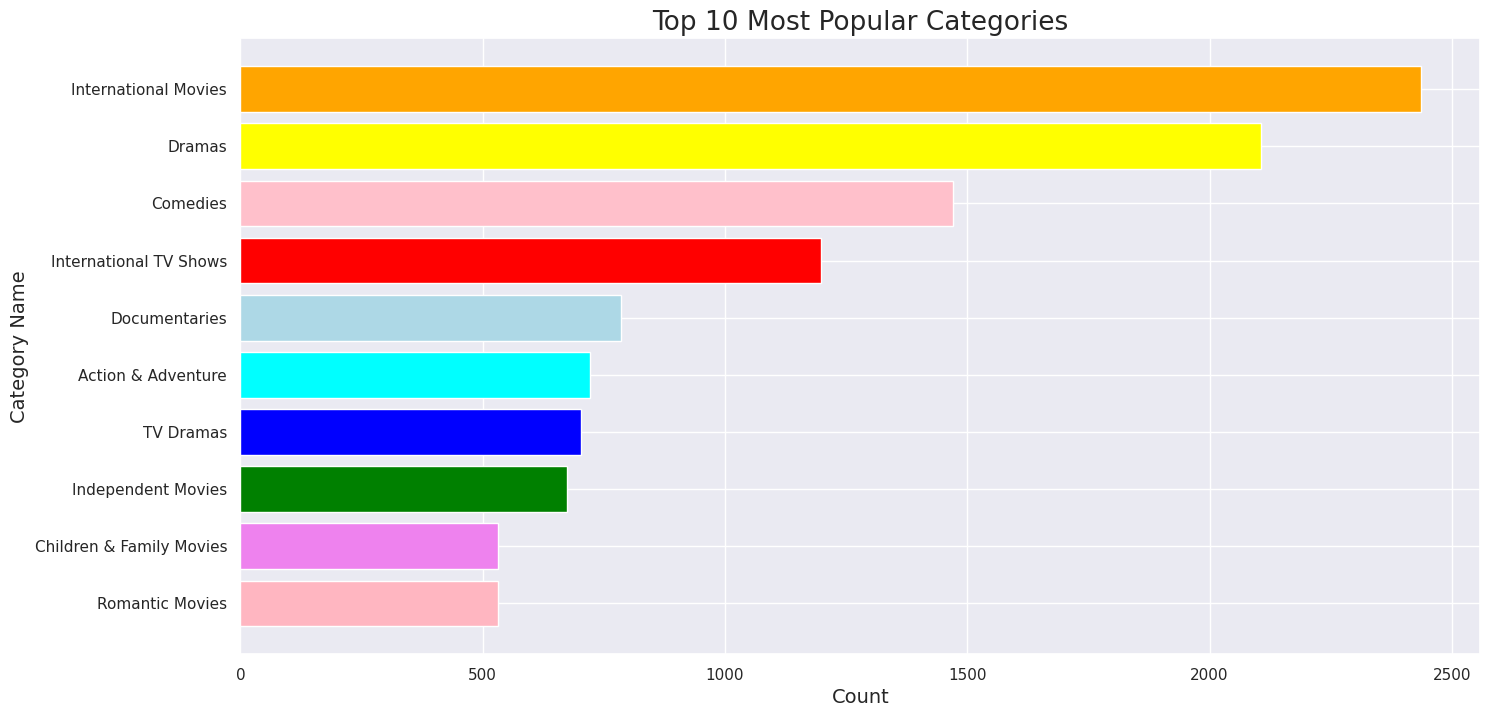

<Figure size 1600x800 with 0 Axes>

In [ ]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

Creating a new column **no_of_category**



*   Datatype of listed_in values



In [ ]:
type(df.listed_in.iloc[0])

str

In [ ]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:
len((df.listed_in.iloc[0]).split(","))

3

In [ ]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:
df['no_of_category'] = no_of_category

In [ ]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


**Histogram of no_of_category using listed_in**

In [ ]:
df.no_of_category.unique()

array([3, 2, 1])

In [ ]:
df.no_of_category.value_counts()

3    3295
2    2684
1    1798
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

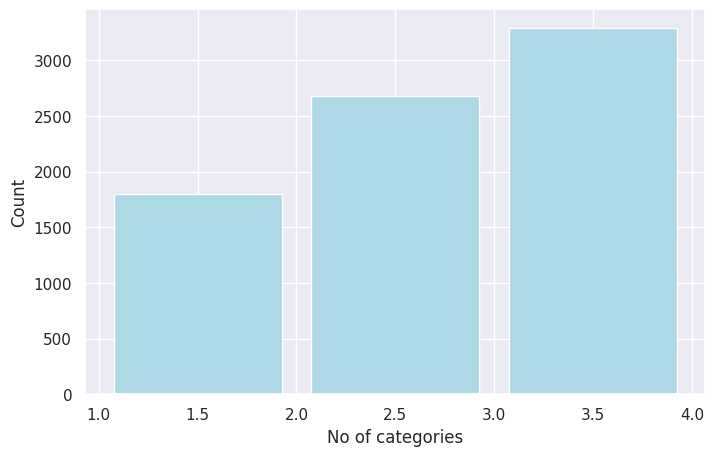

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

Creating a new column **date_added_month** using date_added column

In [ ]:
df.date_added.head(3)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [ ]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [ ]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [ ]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

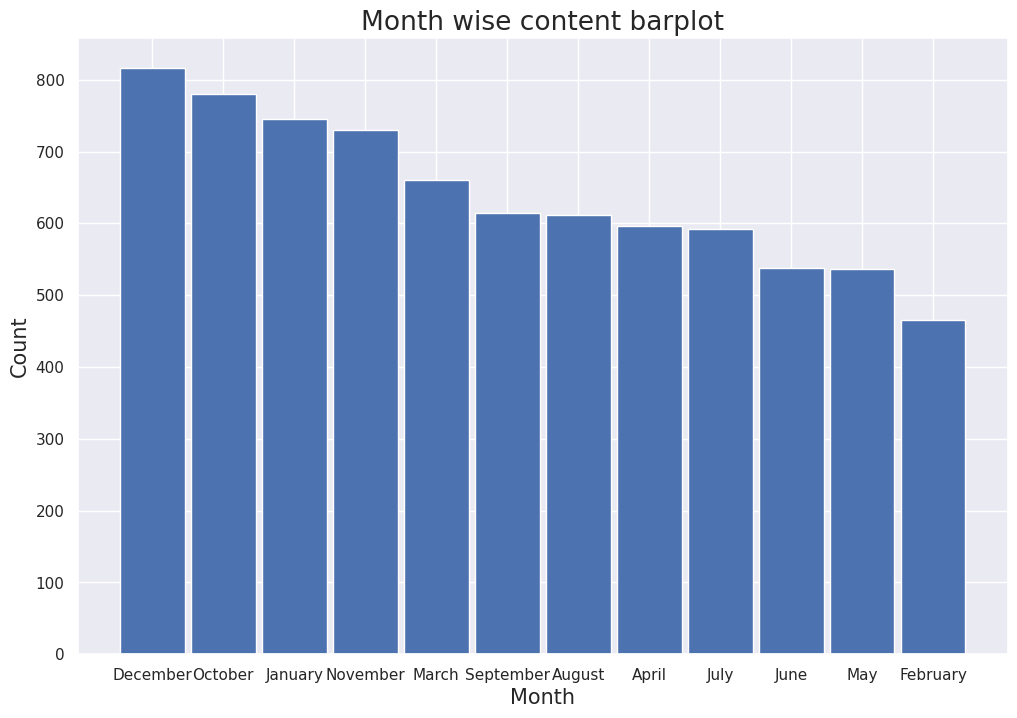

In [ ]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)



*   We can say that December is the holiday season and it also has Christmas, so in that month most of the content got uploaded.



In [ ]:
df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88


**Show_id**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

Checking NaN values

In [ ]:
df.show_id.isna().sum()

0

There is no NaN value present in show_id

**Using value_counts()**

In [ ]:
df.show_id.value_counts()

s1       1
s5175    1
s5203    1
s5202    1
s5201    1
        ..
s2594    1
s2593    1
s2592    1
s2591    1
s7787    1
Name: show_id, Length: 7777, dtype: int64

In [ ]:
df.shape[0]

7777

All the show_id is **unique**

**Checking datatype**

In [ ]:
type(df.show_id.iloc[0])

str

In [ ]:
df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

**Most popular TV-Shows Rating**

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


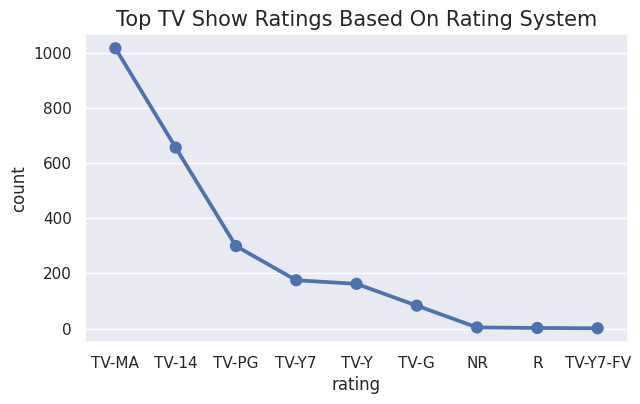

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

**Most popular Movies Rating**

In [ ]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


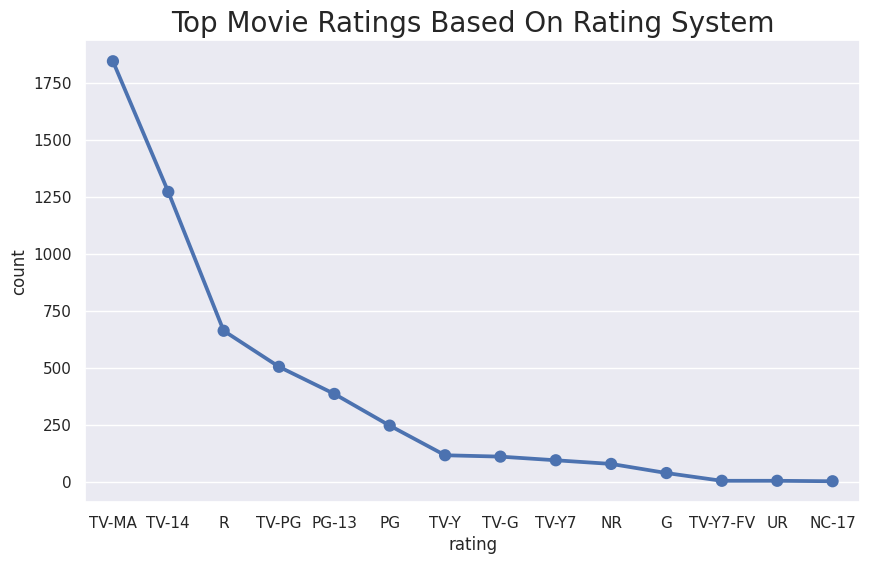

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

Most of the contents got ratings like
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested  )
* NR ( Not Rated )


## <font size="+2" color='#154085'><b>5. Data Prepreation *(nlp data)*

###  **Description**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
First_des = df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

 Importing necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

* **Download nltk**

In [ ]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


* #### <b>5.1.2 Removing punctuations

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

* #### <b> 5.1.3 Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')